# Disimilarity (Tugas 1)

* Cari dataset dari Url
* Tentukan Dissimilarity between binary variable
* Ukur Jarak d(1,2)
* Ukur Jarak d(1,3)
* Ukur Jarak d(1,4)

## Atribut Biner
Atribut biner adalah atribut nominal dengan hanya dua kategori atau status: 0 atau 1, di mana 0 biasanya berarti atribut tidak ada, dan 1 berarti ada. Atribut biner disebut sebagai Boolean jika dua keadaan sesuai dengan benar dan salah.

**Contoh Atribut Biner :**
Diberikan suatu atribut perokok yang menggambarkan objek pasien, 1 menunjukkan bahwa pasien merokok, sedangkan 0 menunjukkan bahwa pasien tidak. Demikian pula, misalkan pasien menjalani tes medis yang memiliki dua kemungkinan hasil. Atribut tes kesehatan adalah biner, dimana nilai 1 berarti hasil tes untuk pasien positif, sedangkan 0 berarti hasilnya negatif.

Atribut biner adalah ***simetris*** jika kedua statusnya sama-sama bernilai dan memiliki bobot yang sama; yaitu, tidak ada preferensi hasil mana yang harus dikodekan sebagai 0 atau 1. Salah satu contohnya adalah atribut gender yang menyatakan laki-laki dan perempuan.

Atribut biner ***asimetris*** jika hasil dari status tidak sama pentingnya, seperti hasil positif dan negatif dari tes medis untuk HIV. Berdasarkan konvensi, kami mengkodekan hasil yang paling penting, yang biasanya yang paling langka, dengan 1 (misalnya, HIV
positif) dan yang lainnya dengan 0 (misalnya, HIV negatif).

## Dissimilarity matrix
Dissimilarity matrix (atau object-by-object structure): Struktur ini menyimpan kumpulan kedekatan yang tersedia untuk semua pasangan n objek. Hal ini sering diwakili oleh tabel n-by-n:




In [ ]:
import numpy as np
B = np.array([[0,0,0,0,],
              ['d(2,1)', 0, 0, 0], 
              ['d(3,1)', 'd(3,2)', 0, 0], 
              ['...', '....', '...', '...'], 
              ['d(n,1)', 'd(n,2)', '...', 0]])
print(B)

[['0' '0' '0' '0']
 ['d(2,1)' '0' '0' '0']
 ['d(3,1)' 'd(3,2)' '0' '0']
 ['...' '....' '...' '...']
 ['d(n,1)' 'd(n,2)' '...' '0']]


dimana d(i, j) adalah dissimilarity atau “different” terukur antara objek i dan j. Secara umum, d(i,j) adalah bilangan non-negatif yang mendekati 0 ketika objek i dan j sangat mirip atau "dekat" satu sama lain, dan semakin besar perbedaannya. Perhatikan bahwa d(i, i) = 0; yaitu, selisih antara objek dan dirinya sendiri adalah 0. Selanjutnya, d(i, j) = d(j, i). (Untuk keterbacaan, kami tidak menunjukkan entri d(j, i); matriksnya simetris.

## Proximity Measures for Binary Attributes
"Jadi, bagaimana kita bisa menghitung perbedaan antara dua atribut biner?"

Salah satu pendekatan melibatkan komputasi *dissimilarity matrix* dari data biner yang diberikan.
Jika semua atribut biner dianggap memiliki bobot yang sama, kita memiliki tabel kontingensi 2 × 2,

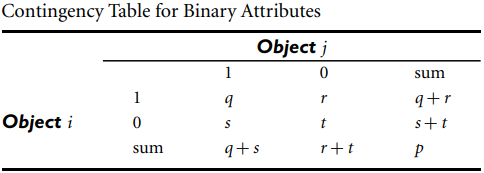

In [7]:
import numpy as np
from PIL import Image
im = Image.open("/content/drive/MyDrive/datamining/tugas/image/ContingencyTableforBinaryAttribut.png")
im

di mana :

*q* = jumlah atribut yang sama dengan 1 untuk kedua objek *i* dan *j*

*r* = jumlah atribut yang sama dengan 1 untuk objek *i* tetapi sama dengan 0 untuk objek *j*

*s* = jumlah atribut yang sama dengan 0 untuk objek *i* tetapi sama dengan 1 untuk objek *j*

*t* = jumlah atribut yang sama dengan 0 untuk kedua objek *i* dan *j*.

*p* = jumlah total atribut, di mana : $$ p = q + r + s + t\$$



Ingatlah bahwa untuk atribut biner simetris, setiap keadaan sama-sama berharga. Dissimilarity yang didasarkan pada atribut biner simetris disebut *symmetric binary dissimilarity*. Jika objek *i* dan *j* dideskripsikan dengan atribut biner simetris, maka dissimilarity antara *i* dan *j* adalah 

$$
d(i, j)=\frac{r + s}{q + r + s + t}\
$$


Untuk atribut biner asimetris, kedua keadaan tidak sama pentingnya, seperti hasil positif (1) dan negatif (0) dari tes penyakit. Diberikan dua atribut biner asimetris, kesepakatan dua 1s (kecocokan positif) kemudian dianggap lebih signifikan daripada dua 0s (kecocokan negatif). Oleh karena itu, atribut biner seperti itu sering dianggap "monary" (memiliki satu state). Dissimilarity berdasarkan atribut ini disebut asymmetric binary dissimilarity, di mana jumlah kecocokan negatif, t, dianggap tidak penting dan dengan demikian diabaikan dalam perhitungan berikut:

$$
d(i,j)=\frac{r + s}{q + r + s}\
$$

Sebagai pelengkap, kita dapat mengukur dissimilarity antara dua atribut biner berdasarkan gagasan similarity, bukan dissimilarity. Misalnya, asymmetric binary similarity antara objek i dan j dapat dihitung sebagai:

$$
sim(i,j)=\frac{r + s}{q + r + s}=1-d(i, j)\
$$

Koefisien sim(i, j) disebut koefisien **Jaccard** dan secara populer dirujuk dalam literatur.

Ketika atribut biner simetris dan asimetris muncul dalam kumpulan data yang sama, pendekatan atribut campuran yang dijelaskan sebagai berikut.

contoh:
Misalkan tabel catatan pasien berisi atribut name, gender, fever, cough, test-1, test-2, test-3, dan test-4, di mana name adalah pengidentifikasi objek, gender adalah atribut simetris , dan atribut yang tersisa adalah biner asimetris.
Untuk nilai atribut asimetris, biarkan nilai Y (ya) dan P (positif) diatur ke 1, dan nilai N (tidak atau negatif) diatur ke 0. 

In [ ]:
dataPatiens = {
    'name':['Jack','Jim','Mary'],
    'gender': ['M', 'M','F '],
    'fever': ['Y','Y','Y'],
    'cough': ['N','Y','N' ],
    'test-1': ['P','N','P' ],
    'test-2': ['N','N','N' ],
    'test-3': ['N','N','P' ],
    'test-4': ['N','N','N' ]}
dataShow = pd.DataFrame(dataPatiens)
print("Relational Table Where Patients Are Described by Binary Attributes\n")
dataShow



Relational Table Where Patients Are Described by Binary Attributes



,name,gender,fever,...,test-2,test-3,test-4
0,Jack,M,Y,...,N,N,N
1,Jim,M,Y,...,N,N,N
2,Mary,F,Y,...,N,P,N


In [ ]:
dataBinary = {
    'name':['Jack','Jim','Mary'],
    'gender': ['M', 'M','F '],
    'fever': ['1','1','1'],
    'cough': ['0','1','0' ],
    'test-1': ['1','0','1' ],
    'test-2': ['0','0','0' ],
    'test-3': ['0','0','1' ],
    'test-4': ['0','0','0' ]}
data= pd.DataFrame(dataBinary)
print("Relational Table Where Patients Are Described by Binary Attributes\n")
data

Relational Table Where Patients Are Described by Binary Attributes



,name,gender,fever,...,test-2,test-3,test-4
0,Jack,M,1,...,0,0,0
1,Jim,M,1,...,0,0,0
2,Mary,F,1,...,0,1,0


Misalkan jarak antara objek (pasien) dihitung hanya berdasarkan atribut asimetris. Maka, jarak antara masing-masing pasangan dari tiga pasien —Jack, Mary, dan Jim— adalah

r(1,0) = 1 (test-1); 

s(0,1) = 1 (cough); 

q(1,1) = 1 (test-2, test-3, test-4)

$$
d(Jack, Jim)=\frac{1 + 1}{1 + 1 + 1}=0,67\
$$

r(1,0) = 0 ; 

s(0,1) = 1 (test-3); 

q(1,1) = 2 (fever, test-1)

$$
d(Jack, Mary)=\frac{0 + 1}{2 + 0 + 1}=0,33\
$$

r(1,0) = 1 (cough); 

s(0,1) = 2 (test-1, test-3); 

q(1,1) = 1 (fever)

$$
d(Jim, Mary)=\frac{1 + 2}{1 + 1 + 2}=0,75\
$$

Pengukuran ini menunjukkan bahwa Jim dan Mary tidak mungkin memiliki penyakit serupa karena mereka memiliki nilai dissimilarity tertinggi di antara ketiga pasangan tersebut. Dari ketiga pasien tersebut, Jack dan Mary adalah yang paling mungkin memiliki penyakit serupa.

## Implementasi

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/datamining/tugas/

/content/drive/MyDrive/datamining/tugas


In [ ]:
#Library
import pandas as pd
import numpy as np

In [ ]:
dataset="https://raw.githubusercontent.com/niniengC/dataset/main/healthcareDatasetStrokeData.csv"
df = pd.read_csv(dataset)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df[['id', 'hypertension', 'heart_disease','stroke']].head(5)

,id,hypertension,heart_disease,stroke
0,9046,0,1,1
1,51676,0,0,1
2,31112,0,1,1
3,60182,0,0,1
4,1665,1,0,1


In [ ]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(df, idx, series):
    return df.loc[(idx), series]

In [ ]:
def get_dissimilarity_dataset(df, series_index = [], series = []):
    first_series = get_series(df, series_index[0], series)
    second_series = get_series(df, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [ ]:
def count_contingency_value(df, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = df.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(df.loc[(start_index):(last_index), df.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):
  r=contingency_value["r"]
  s= contingency_value["s"]
  q= contingency_value["q"]
  t= contingency_value["t"]
  objek_i= r+s
  objek_j = q+r+s+t
  if (objek_j==0 and objek_i==0) or (objek_j!=0 and objek_i==0):
    df = 0.0
  elif (objek_j==0 and objek_i!=0):
    df = "infinity"
  else:
    df =  objek_i/objek_j
                                                           
  return (df)

In [ ]:
#df(1,2)
get_dissimilarity_dataset(df, [1,2], ['hypertension','heart_disease','stroke']).T


,1,2
hypertension,0,0
heart_disease,0,1
stroke,1,1


In [ ]:
df_1_2 = get_dissimilarity_dataset(df, [1,2], ['hypertension','heart_disease', 'stroke'])
c_d_1_2 = count_contingency_value(df_1_2, 1, 2)
c_d_1_2

{'q': 1, 'r': 0, 's': 1, 't': 1}

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_2

0.3333333333333333

In [ ]:
#df(1,3)
get_dissimilarity_dataset(df, [1,3], ['hypertension','heart_disease','stroke']).T

,1,3
hypertension,0,0
heart_disease,0,0
stroke,1,1


In [ ]:
df_1_3 = get_dissimilarity_dataset(df, [1,3], ['hypertension','heart_disease','stroke'])
c_d_1_3 = count_contingency_value(df_1_3, 1, 3)
c_d_1_3

{'q': 1, 'r': 0, 's': 0, 't': 2}

In [ ]:
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_3)
d_1_3

0.0

In [ ]:
#df(1,4)
get_dissimilarity_dataset(df, [1,4], ['hypertension','heart_disease','stroke']).T

,1,4
hypertension,0,1
heart_disease,0,0
stroke,1,1


In [ ]:
df_1_4 = get_dissimilarity_dataset(df, [1,4], ['hypertension','heart_disease','stroke'])
c_d_1_4 = count_contingency_value(df_1_4, 1, 4)
c_d_1_4

{'q': 1, 'r': 0, 's': 1, 't': 1}

In [ ]:
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_4)
d_1_4

0.3333333333333333